<a href="https://colab.research.google.com/github/ljunwon1114/2022bioinfohw/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7136706
-r-------- 1 root root 1370036258 May  6  2021 CLIP-35L33G.bam
-r-------- 1 root root    3118336 May  6  2021 CLIP-35L33G.bam.bai
-r-------- 1 root root  883334756 May  5  2021 gencode.gtf
-r-------- 1 root root 1003658801 May  6  2021 RNA-control.bam
-r-------- 1 root root    2276104 May  6  2021 RNA-control.bam.bai
-r-------- 1 root root 1260991122 May  6  2021 RNA-siLin28a.bam
-r-------- 1 root root    2710744 May  6  2021 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 May  6  2021 RNA-siLuc.bam
-r-------- 1 root root    2606104 May  6  2021 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 May  6  2021 RPF-siLin28a.bam
-r-------- 1 root root    2482768 May  6  2021 RPF-siLin28a.bam.bai
-r-------- 1 root root 1055123479 May  6  2021 RPF-siLuc.bam
-r-------- 1 root root    2605912 May  6  2021 RPF-siLuc.bam.bai


In [ ]:
#checking MD5
!md5sum drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
d54d428f5872030c4ffc43058709b896  drive/MyDrive/binfo1-datapack1/gencode.gtf
328883a73d507eafbf5b60bd6b906201  drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  drive/MyDrive/binfo1-datapack1/RPF-siLuc.bam
dc24f69e8f571f

In [ ]:
!ls -al drive/MyDrive/binfo*

lrw------- 1 root root 0 May  6 04:32 drive/MyDrive/binfo1-datapack1 -> /content/drive/.shortcut-targets-by-id/1Y190lbO42VEzjjQkgoxNf_EcZJlHyZa1/binfo1-datapack1


In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.profile
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bashrc.biolab
./root/.tmux.conf
./root/.condarc
--2022-05-06 04:41:59--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75660608 (72M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  72.16M   126MB/s    in 0.6s    

2022-05-06 04:42:00 (126 MB/s) - ‘miniconda3.sh’ save

In [ ]:
#실습에 필요한 프로그램 설치
!conda install -y subread

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    subread-2.0.1              |       h7132678_2        22.9 MB  bioconda
    ------------------------------------------------------------
                                           Total:        22.9 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h7132678_2



subread-2.0.1        | 22.9 MB   | : 100% 1.0/1 [00:04<00:00,  4.67s/it]               
Preparing transaction: | done
Ve

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [ ]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/.shortcut-targets-by-id/1Y190lbO42VEzjjQkgoxNf_EcZJlHyZa1/binfo1-datapack1


In [ ]:
!mkdir /content/drive/MyDrive/binfo1-work
!cp /content/drive/MyDrive/binfo1-datapack1/*.* /content/drive/MyDrive/binfo1-work/
!ls -al /content/drive/MyDrive/binfo1-work


total 7136706
-rw------- 1 root root 1370036258 May  6 04:56 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6 04:56 CLIP-35L33G.bam.bai
-rw------- 1 root root  883334756 May  6 04:57 gencode.gtf
-rw------- 1 root root 1003658801 May  6 04:57 RNA-control.bam
-rw------- 1 root root    2276104 May  6 04:57 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May  6 04:57 RNA-siLin28a.bam
-rw------- 1 root root    2710744 May  6 04:57 RNA-siLin28a.bam.bai
-rw------- 1 root root  981684502 May  6 04:57 RNA-siLuc.bam
-rw------- 1 root root    2606104 May  6 04:57 RNA-siLuc.bam.bai
-rw------- 1 root root  737352902 May  6 04:58 RPF-siLin28a.bam
-rw------- 1 root root    2482768 May  6 04:58 RPF-siLin28a.bam.bai
-rw------- 1 root root 1055123479 May  6 04:58 RPF-siLuc.bam
-rw------- 1 root root    2605912 May  6 04:58 RPF-siLuc.bam.bai


In [ ]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [ ]:
%ls

CLIP-35L33G.bam      RNA-siLin28a.bam      RPF-siLin28a.bam.bai
CLIP-35L33G.bam.bai  RNA-siLin28a.bam.bai  RPF-siLuc.bam
gencode.gtf          RNA-siLuc.bam         RPF-siLuc.bam.bai
RNA-control.bam      RNA-siLuc.bam.bai
RNA-control.bam.bai  RPF-siLin28a.bam


In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

결과를 pandas로

In [ ]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


대충 그림을 그려 봅니다.

In [ ]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


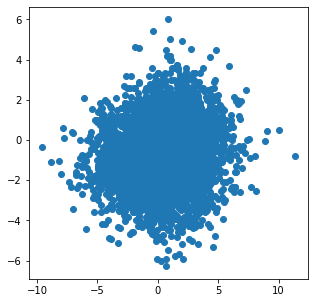

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

논문의 그림처럼 한 번 만들어 봅시다

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~


In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.
